# Exploring Stackoverflow Anual Survey 2019

This is the first project for Udacity's Data Scientist Nanodegree. The data used in this project was obtained from [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey)  The whole project is implemented following "Cross-Industry Standard Process for Data Mining (CRISP-DM)" process, an industry standard for data analysis. It includes 6 steps: 

1. Business Understanding.
2. Data Understanding.
3. Prepare Data.
4. Data Modeling.
5. Evaluate the Results
6. Deploy.

In this project, we will follow the above steps to explore the data. 

## 1. Business Understanding
Being a female in technology myself, I am mostly interested in what female scientists feels working/studyin in this field. Therefore I would like to find answers to the following questions:

1. What are the distributions of females with respect to country, ethnicity, level of education, etc?
2. What is the most popular type of development among females?
3. What does the data suggest of males and females in terms of salary and working hours? 
4. What factors associat with high salary, eg. education level, major, etc.?
5. Female with what skills receive the highest salary?

With these questions in mind, let's get into the data.

## 2. Data Understanding
First of all, let's import some useful libriaries and load the data.

In [1]:
# Import libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import data_process as p
%matplotlib inline

# load the data and take a look at the first several rows to get a big picture
sof = pd.read_csv("data/survey_results_public.csv")
schema = pd.read_csv('data/survey_results_schema.csv')
sof.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
# Total rows and columns
sof.shape

(88883, 85)

In [3]:
# Schema data : descriptions for each column
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


The dataset has 88883 rows and 85 columns, let's take a look at missing values in general:

In [4]:
p.missing_ratio(sof).head()

,Count,Ratio
BlockchainOrg,40708,45.799534
CodeRevHrs,39093,43.982539
ConvertedComp,33060,37.194964
CompTotal,32938,37.057705
MiscTechWorkedWith,29297,32.961309


The column that has the most missing values is BlockchanOrg, lets get the description of it to see what the question is:

In [10]:
# Get the question description for column 'BlockchainOrg'
p.get_description('BlockchainOrg',schema)

'How is your organization thinking about or implementing blockchain technology?'

It turns out that this is an open question. I personally don't like open questions in the survey and I think most people feels the same way becasue it takes time to think and organize words. And this might be one of the reasons that people leave this question blank. 

In [18]:
# Get the question description for column 'CodeRevHrs' and 'ConvertedComp'
p.get_description('CodeRevHrs',schema),p.get_description('ConvertedComp',schema)

('On average, how many hours per week do you spend on code review?',
 'Salary converted to annual USD salaries using the exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.')

'CodeRevHrs' and 'ConvertedComp' also have large amount of missing values, the reason could be that both questions invlove calculation, which takes time. In addition, many people may not want to disclose their salary. 

Next, let's take a look at gender distribution.

In [19]:
gender = sof['Gender'].value_counts()
gender

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

The above result shows that this is a multiple chioce quesion and one column content would have several answers, separated by semicolon. We need to split these strings by semicolon and count the total in each category. Here I used a function from parpare_data.py module for this purpose. 

In [20]:
gender_splitted = p.split_column_content(sof,'Gender')
gender_splitted.head()

0  0    Man
1  0    Man
2  0    Man
3  0    Man
4  0    Man
dtype: object

In [21]:
gender_splitted.head()

0  0    Man
1  0    Man
2  0    Man
3  0    Man
4  0    Man
dtype: object

Nice! This looks good. Let's count values and plot:

                                                type     ratio
0                                                Man  0.910256
1                                              Woman  0.077992
2  Non-binary, genderqueer, or gender non-conforming  0.011753


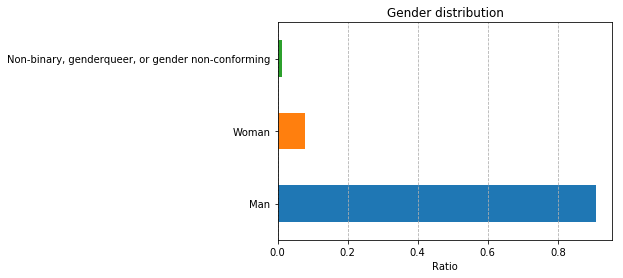

In [22]:


# gender_ratio = gender_splitted.value_counts()/gender_splitted.shape[0]
# gender_df = pd.DataFrame(pd.Series(gender_ratio)).reset_index()
# gender_df.columns = ['gender','ratio']

# gender_ratio.plot(kind='barh')
# print(gender_df)
# plt.title('Gender distribution')
# plt.grid(axis='x',linestyle='--')
# plt.xlabel('Ratio')
# plt.show()
# plt.savefig('gender')

# fig, ax = plt.subplots()
# ax.plot(kind = 'bar', x = gender_df['gender'], y = gender_df['ratio'])
# ax.set(xlabel='gender', ylabel='ratio',
#        title='Gender distribution')
# ax.grid()

p.count_and_plot(gender_splitted, 'Gender distribution' )

We can see that male developers occupy 91% of the total population while female only 7.8%, which shold be a suprising finding since gender gap is a well known issue in IT industry. Rather than the gap, I am inerested in other aspects of female in tech field such as the questions I presiously listed. 

Now, let's try to answer these questions: 
### Q1. What are the distributions of females with respect to country, ethnicity, level of education, etc?

In [23]:
# Choose data related to women
women_df = sof[sof['Gender']=='Woman']
# Drop columns with all nan values
women_df = women_df.dropna(how='all', axis=1)

# Choose data related to men for future use
men_df = sof[sof['Gender']=='Man']
# Drop columns with all nan values
men_df = men_df.dropna(how='all', axis=1)

women_df.shape

(6344, 85)

                                                type     ratio
0                       White or of European descent  0.634672
1                                        South Asian  0.089455
2                                         East Asian  0.068397
3                          Hispanic or Latino/Latina  0.061214
4                        Black or of African descent  0.048808
5                                     Middle Eastern  0.041136
6                                        Multiracial  0.025139
7                                           Biracial  0.021058
8  Native American, Pacific Islander, or Indigeno...  0.010121


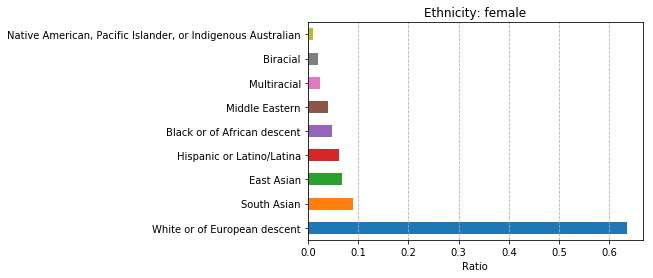

In [35]:
# Plot the top 10 ethniciy in female
# p.plot_value_counts(women_df,'Ethnicity') 
bar_width = 0.3


p.count_and_plot(p.split_column_content(women_df,'Ethnicity'),'Ethnicity: female')

                                                type     ratio
0                       White or of European descent  0.657945
1                                        South Asian  0.111909
2                          Hispanic or Latino/Latina  0.066281
3                                         East Asian  0.051928
4                                     Middle Eastern  0.043447
5                        Black or of African descent  0.031435
6                                        Multiracial  0.020105
7                                           Biracial  0.010648
8  Native American, Pacific Islander, or Indigeno...  0.006300


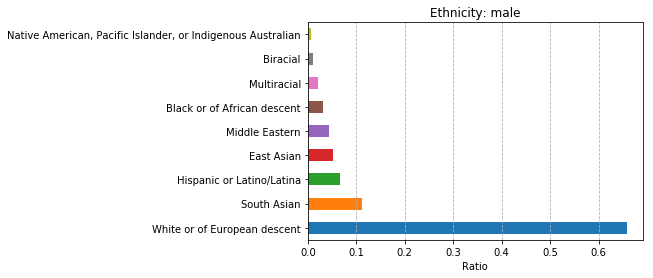

In [36]:
p.count_and_plot(p.split_column_content(men_df,'Ethnicity'),'Ethnicity: male')

             type     ratio
0   United States  0.329760
1           India  0.089849
2  United Kingdom  0.067150
3          Canada  0.049023
4         Germany  0.046658
5          France  0.017970
6       Australia  0.017497
7          Poland  0.017024
8     Netherlands  0.017024
9         Romania  0.015132


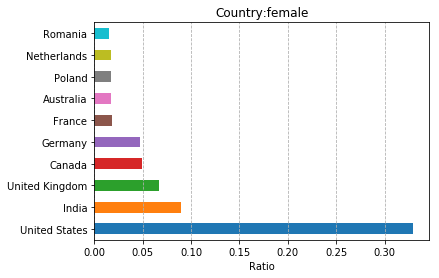

In [37]:
p.count_and_plot(p.split_column_content(women_df,'Country'),'Country:female')

             type     ratio
0   United States  0.227159
1           India  0.100130
2         Germany  0.067878
3  United Kingdom  0.064939
4          Canada  0.037423
5          France  0.027978
6          Brazil  0.023255
7          Poland  0.022549
8       Australia  0.021612
9     Netherlands  0.021510


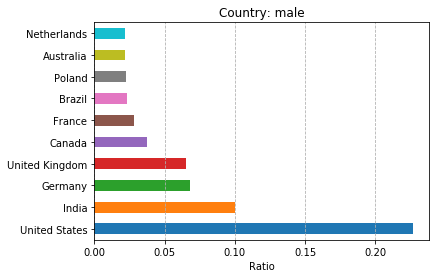

In [38]:
p.count_and_plot(p.split_column_content(men_df,'Country'),'Country: male')

                                                type     ratio
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  0.501617
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  0.240220
2  Some college/university study without earning ...  0.094083
3  Secondary school (e.g. American high school, G...  0.073553
4                                   Associate degree  0.031684
5          Other doctoral degree (Ph.D, Ed.D., etc.)  0.030068
6                 Professional degree (JD, MD, etc.)  0.012609
7                          Primary/elementary school  0.008083
8             I never completed any formal education  0.008083


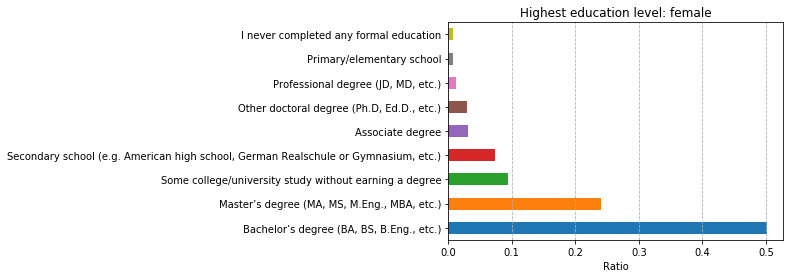

In [39]:
p.count_and_plot(p.split_column_content(women_df,'EdLevel'),'Highest education level: female')

                                                type     ratio
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  0.450009
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)  0.226783
2  Some college/university study without earning ...  0.123756
3  Secondary school (e.g. American high school, G...  0.101596
4                                   Associate degree  0.034067
5          Other doctoral degree (Ph.D, Ed.D., etc.)  0.027582
6                          Primary/elementary school  0.016738
7                 Professional degree (JD, MD, etc.)  0.013968
8             I never completed any formal education  0.005501


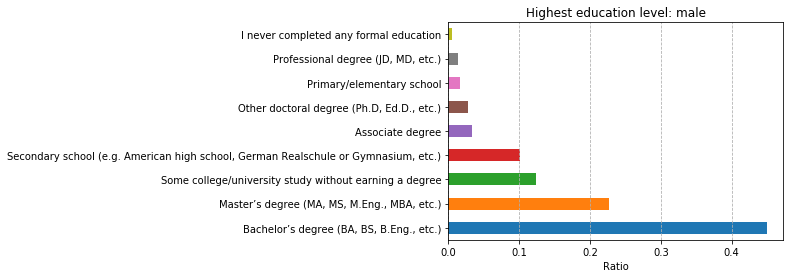

In [40]:
p.count_and_plot(p.split_column_content(men_df,'EdLevel'),'Highest education level: male')

                                                type     ratio
0  Computer science, computer engineering, or sof...  0.526707
1  Information systems, information technology, o...  0.064096
2  A natural science (ex. biology, chemistry, phy...  0.056672
3  A humanities discipline (ex. literature, histo...  0.055405
4  Another engineering discipline (ex. civil, ele...  0.053775
5  A social science (ex. anthropology, psychology...  0.053051
6                          Mathematics or statistics  0.051602
7                      Web development or web design  0.048162
8  Fine arts or performing arts (ex. graphic desi...  0.036212
9  A business discipline (ex. accounting, finance...  0.035307


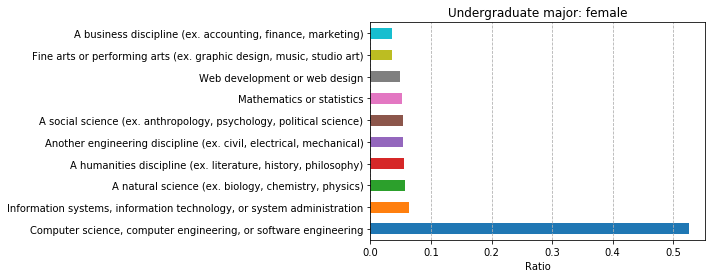

In [41]:
p.count_and_plot(p.split_column_content(women_df,'UndergradMajor'),'Undergraduate major: female')

                                                type     ratio
0  Computer science, computer engineering, or sof...  0.633520
1  Another engineering discipline (ex. civil, ele...  0.085542
2  Information systems, information technology, o...  0.070324
3                      Web development or web design  0.044377
4  A natural science (ex. biology, chemistry, phy...  0.041195
5                          Mathematics or statistics  0.037954
6  A business discipline (ex. accounting, finance...  0.023937
7  A humanities discipline (ex. literature, histo...  0.017559
8  A social science (ex. anthropology, psychology...  0.014872
9  Fine arts or performing arts (ex. graphic desi...  0.014122


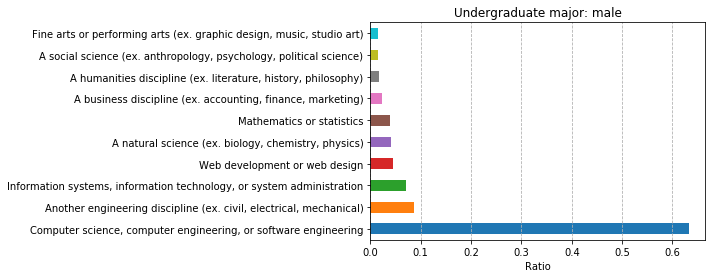

In [42]:
p.count_and_plot(p.split_column_content(men_df,'UndergradMajor'),'Undergraduate major: male')

### Q2. 2. What are the challenges that females are facing in tech field? 

In [43]:
p.get_description('WorkChallenge',schema)

'Of these options, what are your greatest challenges to productivity as a developer? Select up to 3:'

                                                type     ratio
0                       Distracting work environment  0.161705
1                                           Meetings  0.140308
2             Being tasked with non-development work  0.131935
3                 Not enough people for the workload  0.126522
4                    Lack of support from management  0.104110
5                             Toxic work environment  0.090663
6  Non-work commitments (parenting, school work, ...  0.083474
7                               Time spent commuting  0.080768
8               Inadequate access to necessary tools  0.080514


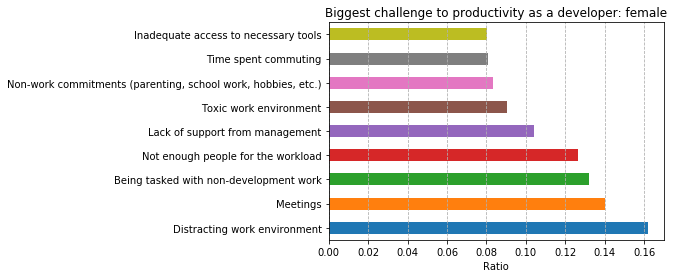

In [44]:
p.count_and_plot(p.split_column_content(women_df,'WorkChallenge'), 'Biggest challenge to productivity as a developer: female')

                                                type     ratio
0                       Distracting work environment  0.162504
1             Being tasked with non-development work  0.143066
2                                           Meetings  0.142557
3                 Not enough people for the workload  0.130735
4                    Lack of support from management  0.102924
5               Inadequate access to necessary tools  0.082028
6                             Toxic work environment  0.079636
7                               Time spent commuting  0.079528
8  Non-work commitments (parenting, school work, ...  0.077021


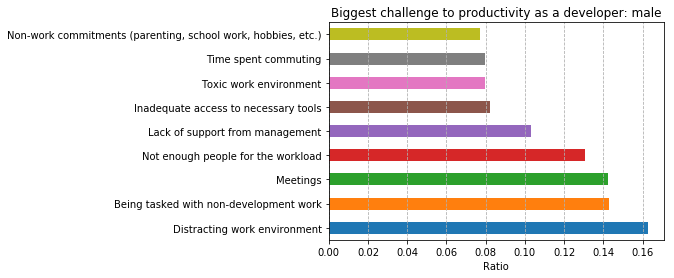

In [46]:
p.count_and_plot(p.split_column_content(men_df,'WorkChallenge'), 'Biggest challenge to productivity as a developer: male')

### Q3. What does the data suggest of males and females in terms of salary and working hours? 

## 3. Prepare Data
Given the fact that some survey questions has multiple choices, we need to further clean and process the data for our analysis.

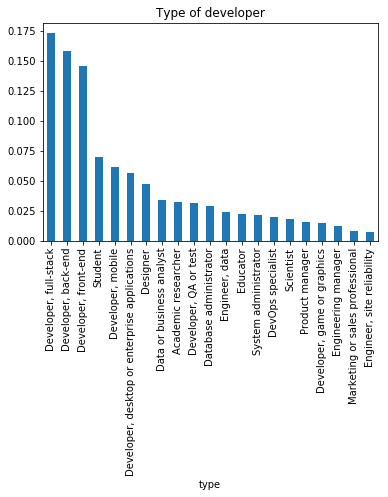

In [74]:
# Pull out all the opitions in DevType column
possible_vals = ['Academic researcher','Data or business analyst','Data scientist or machine learning specialise',
                'Database administrator','Designer','Developer, back-end','Developer, desktop or enterprise applications',
                'Developer,embedded applications or devices','Developer, front-end','Developer, full-stack',
                'Developer, game or graphics','Developer, mobile','Developer, QA or test','DevOps specialist',
                'Educator','Engineer, data','Engineer, site reliability','Engineering manager','Marketing or sales professional',
                'Product manager','Scientist','Senior Executive (C-Suite, VP, etc.)','Student','System administrator','Other']



# def plot_bar(df, col):
#     '''
#     INPUT - df - pandas dataframe 
#             col - string - the name of the column you would like to know about
#     OUTPUT - a bar chart
#     '''
#     top_ten = df[col].value_counts()
#     (top_ten/df.shape[0]).plot(kind='bar')
#     plt.title(col)
    
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - string the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of dev types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the dev type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df    

def clean_and_plot(df, col, title='Type of developer', plot=True):
    '''
    INPUT 
        df - a dataframe holding the column we want
        col - string a column name that you want to look at
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        dev_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the desired column.
    '''
    dev = df[col].value_counts().reset_index()
    dev.rename(columns={'index': 'type', col: 'count'}, inplace=True)
    dev_df = total_count(dev, 'type', 'count', possible_vals)

    dev_df.set_index('type', inplace=True)
    if plot:
        (dev_df/dev_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_dev_df = dev_df/dev_df.sum()
    return props_dev_df

def group_and_count(df, col1, col2):
    '''
    INPUT
        df - a dataframe we are inerested
        col1 - string a column name that we want to group
        col2 - string a column name that we want to do value counts
    OUTPUT
        new_df - a dataframe with desired format
    '''
    new_df = df.groupby(col1).agg({col2:'count'})
    return new_df

dev_df = clean_and_plot(women_df,'DevType')   


In [158]:
split_column_content(women_df,'DevType').value_counts().sort_values(ascending=False).

Developer, full-stack                            2307
Developer, back-end                              2111
Developer, front-end                             1941
Student                                           928
Developer, mobile                                 824
Developer, desktop or enterprise applications     752
Designer                                          625
Data scientist or machine learning specialist     486
Data or business analyst                          453
Academic researcher                               428
Developer, QA or test                             423
Database administrator                            384
Engineer, data                                    313
Educator                                          296
System administrator                              287
Developer, embedded applications or devices       276
DevOps specialist                                 266
Scientist                                         236
Product manager             

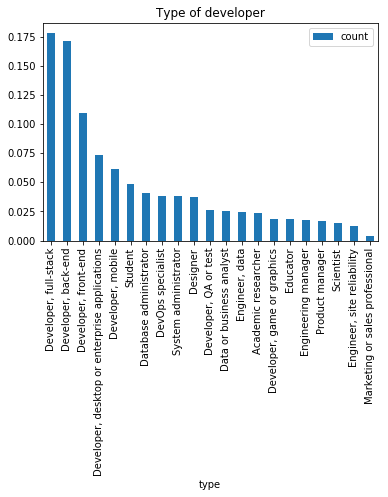

In [13]:
dev_men = clean_and_plot(men_df,'DevType')

In [21]:
women_df.groupby('Country').agg({'Dependents': 'count'}).head()

,Dependents
Country,
Afghanistan,2
Albania,12
Algeria,11
Andorra,1
Angola,1


In [68]:
# women_df.groupby('MainBranch').agg({'Dependents': 'count'})
group_and_count(women_df,'MainBranch','Dependents').reset_index()



/anaconda2/envs/scipy36/lib/python3.6/site-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyError: 'Woman'

In [27]:
women_df.groupby('WorkChallenge').agg({'Dependents': 'count'}).head()

,Dependents
WorkChallenge,
Being tasked with non-development work,73
Being tasked with non-development work;Distracting work environment,57
Being tasked with non-development work;Distracting work environment;Inadequate access to necessary tools,48
Being tasked with non-development work;Distracting work environment;Lack of support from management,54
Being tasked with non-development work;Distracting work environment;Meetings,161


In [55]:
women_df.groupby('JobFactors').agg({'Dependents': 'count'}).reset_index().head()

,JobFactors,Dependents
0,Diversity of the company or organization,7
1,Diversity of the company or organization;How w...,25
2,Financial performance or funding status of the...,5
3,Financial performance or funding status of the...,1
4,Financial performance or funding status of the...,5


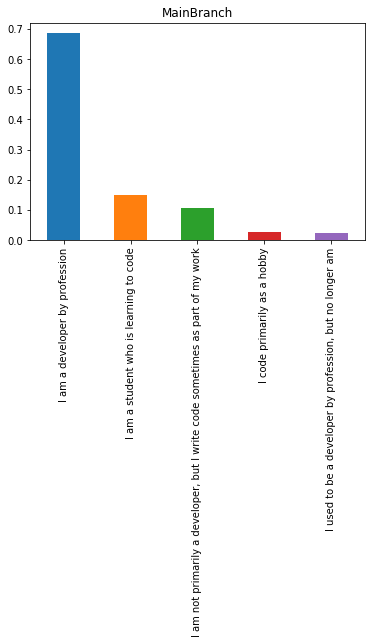

In [151]:
plot_bar(women_df,'MainBranch')

In [152]:
# Select several attributes of concern
women_ethnicity = women_df['Ethnicity'].value_counts()
women_ethnicity.head()

White or of European descent    3587
South Asian                      498
East Asian                       334
Black or of African descent      238
Hispanic or Latino/Latina        210
Name: Ethnicity, dtype: int64

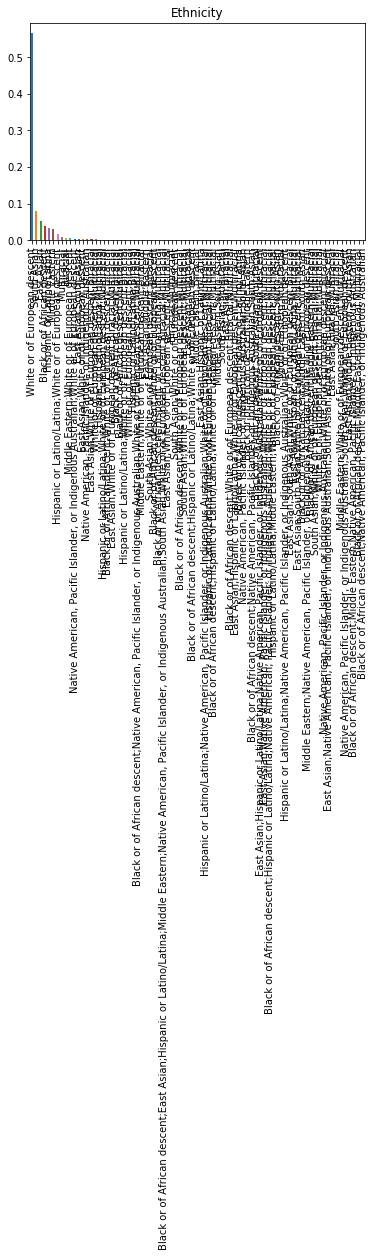

In [153]:


(women_ethnicity/women_df.shape[0]).plot(kind="bar");
plt.title("Ethnicity");


In [154]:
women_age = show_value_counts(women_df,'Age')
# (women_age/women_df.shape[0]).plot(kind="bar");
# plt.title("Age");

In [81]:
women_yearsCode = show_value_counts(women_df,'YearsCode')
(women_yearsCOde/women_df.shape[0]).plot(kind="bar");
plt.title("YearsCode");

5    634
3    546
4    532
6    497
2    479
Name: YearsCode, dtype: int64

In [73]:
women_country = show_value_counts(women_df,'Country')
(women_ethnicity/women_df.shape[0]).plot(kind="bar");
plt.title("Ethnicity");
women_country.hea

United States     2092
India              570
United Kingdom     426
Canada             311
Germany            296
Name: Country, dtype: int64

In [53]:
women_df['MainBranch'].value_counts()

I am a developer by profession                                                   4355
I am a student who is learning to code                                            945
I am not primarily a developer, but I write code sometimes as part of my work     670
I code primarily as a hobby                                                       174
I used to be a developer by profession, but no longer am                          138
Name: MainBranch, dtype: int64

In [55]:
women_df['Employment'].value_counts()

Employed full-time                                      4601
Not employed, but looking for work                       516
Employed part-time                                       419
Independent contractor, freelancer, or self-employed     416
Not employed, and not looking for work                   258
Retired                                                   22
Name: Employment, dtype: int64

In [101]:
women_df['LanguageWorkedWith'].value_counts().head()

HTML/CSS;JavaScript               219
HTML/CSS;JavaScript;PHP;SQL       117
C#;HTML/CSS;JavaScript;SQL        106
HTML/CSS;JavaScript;PHP           102
HTML/CSS;JavaScript;TypeScript     88
Name: LanguageWorkedWith, dtype: int64

In [100]:
men_df['LanguageWorkedWith'].value_counts().head()

HTML/CSS;JavaScript;PHP;SQL              1304
C#;HTML/CSS;JavaScript;SQL               1257
HTML/CSS;JavaScript                       975
C#;HTML/CSS;JavaScript;SQL;TypeScript     907
Java                                      780
Name: LanguageWorkedWith, dtype: int64

There are only 5 columns of numerical data, excluding Respondent id, which does not make any sense in calculation.  Let's create a correlation matrix to see if there are any correlation among these numerical data




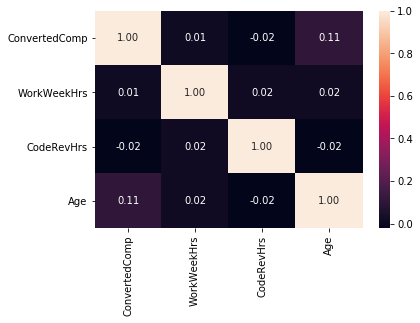

In [59]:
# salary = sof[['ConvertedComp','WorkWeekHrs','CodeRevHrs','Age']].dropna(axis=0,how='all')
salary = sof[['ConvertedComp','WorkWeekHrs','CodeRevHrs','Age']]
sns.heatmap(salary.corr(), annot=True, fmt=".2f");

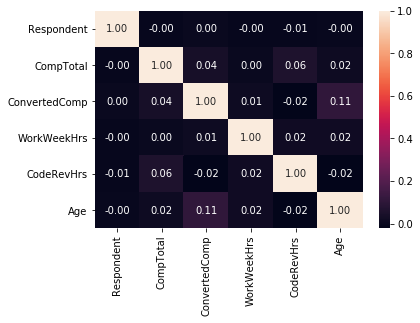

In [28]:
sns.heatmap(sof.corr(), annot=True, fmt=".2f");

Unfortunately, the heatmap shows that none of the variables appear to greatly correlated with each other. We need to explore more. 

Let's look at the categorical data:

In [67]:
# Select all the columns with categorical data
all_categorical = women_df.select_dtypes(include=['object']).copy().head()
all_categorical

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,SOComm,WelcomeChange,SONewContent,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
11,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time",Some college/university study without earning ...,Mathematics or statistics,Taken an online course in programming or softw...,...,"Yes, somewhat",Just as welcome now as I felt last year,Courses on technologies you're interested in,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
30,I am a student who is learning to code,No,Never,NaN,"Not employed, and not looking for work",Canada,No,Primary/elementary school,NaN,NaN,...,"No, not really",NaN,NaN,Woman,No,NaN,East Asian,No,Too long,Neither easy nor difficult
34,I am a developer by profession,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken a part-time in-person course in programm...,...,Not sure,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
50,I am a student who is learning to code,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,United States,"Yes, full-time",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,"No, not really",Just as welcome now as I felt last year,Tech articles written by other developers,Woman,No,Straight / Heterosexual,South Asian,No,Too long,Easy
70,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Philippines,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,...,"Yes, definitely",A lot more welcome now than last year,Tech articles written by other developers;Tech...,Woman,No,Straight / Heterosexual,East Asian;South Asian,No,Appropriate in length,Easy


Taking a look at all the columns, we detect that there are 5 columns related to compensation(salary).Let's select these columns and take a further look:

Lets further select some categorical features that may affect salarys:

In [65]:
cat_df = women_df[['EdLevel','UndergradMajor','EduOther','DevType','YearsCode']]
cat_df

,EdLevel,UndergradMajor,EduOther,DevType,YearsCode
11,Some college/university study without earning ...,Mathematics or statistics,Taken an online course in programming or softw...,Data or business analyst;Data scientist or mac...,5
30,Primary/elementary school,NaN,NaN,NaN,Less than 1 year
34,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",Taken a part-time in-person course in programm...,"Developer, front-end",14
50,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Data or business analyst;Developer, full-stack",4
70,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"Developer, full-stack",4
74,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Developer, front-end",7
85,Some college/university study without earning ...,"Information systems, information technology, o...",Taken an online course in programming or softw...,"Developer, back-end;Developer, front-end;Educator",6
99,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","Taught yourself a new language, framework, or ...","Developer, back-end;Developer, front-end;Devel...",33
104,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"Designer;Developer, front-end;Developer, full-...",9
140,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Received on-the-job training in software devel...,"Developer, back-end",8


In [66]:
for var in  cat_df:
        # for each cat add dummy var, drop original column
    df = pd.concat([salary, pd.get_dummies(women_df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
df.head()

,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,YearsCode_10,YearsCode_11,YearsCode_12,YearsCode_13,YearsCode_14,YearsCode_15,...,YearsCode_48,YearsCode_49,YearsCode_5,YearsCode_50,YearsCode_6,YearsCode_7,YearsCode_8,YearsCode_9,YearsCode_Less than 1 year,YearsCode_More than 50 years
0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8820.0,40.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61000.0,80.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,55.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Model Data

# 5. Results

# 6. Deploy